In [49]:
import numpy as np
import pandas as pd
from sklearn import model_selection

In [50]:
df_train=pd.read_csv("train.csv")

In [51]:
df_train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,B,B,B,C,B,B,A,E,C,...,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634
1,2,B,B,A,A,B,D,A,F,A,...,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233
2,3,A,A,A,C,B,D,A,D,A,...,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351
3,4,B,B,A,C,B,D,A,E,C,...,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253
4,6,A,A,A,C,B,D,A,E,A,...,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260


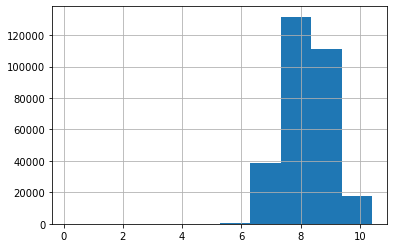

In [52]:
#see the destribution of target
df_train.target.hist()

if Destribution of each fold is same , we use KFold

In [53]:
kf=model_selection.KFold(n_splits=5,shuffle=True,random_state=42)

In [54]:
df_train.shape

(300000, 26)

In [55]:
#deviding seperate 
for fold,(train_indicies,valid_indicies) in enumerate(kf.split(X=df_train)):
    print(fold,"    ",train_indicies,"    ",valid_indicies)   

0      [     1      2      3 ... 299997 299998 299999]      [     0      6     11 ... 299973 299983 299992]
1      [     0      1      2 ... 299995 299996 299998]      [     4     10     31 ... 299982 299997 299999]
2      [     0      2      3 ... 299997 299998 299999]      [     1      9     20 ... 299987 299988 299991]
3      [     0      1      2 ... 299995 299997 299999]      [     3      7      8 ... 299994 299996 299998]
4      [     0      1      3 ... 299997 299998 299999]      [     2      5     13 ... 299990 299993 299995]


In [56]:
df_train["kfold"]=-1
df_train

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target,kfold
0,1,B,B,B,C,B,B,A,E,C,...,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634,-1
1,2,B,B,A,A,B,D,A,F,A,...,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233,-1
2,3,A,A,A,C,B,D,A,D,A,...,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351,-1
3,4,B,B,A,C,B,D,A,E,C,...,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253,-1
4,6,A,A,A,C,B,D,A,E,A,...,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,499993,B,B,A,A,B,D,A,E,A,...,0.450538,0.934360,1.005077,0.853726,0.422541,1.063463,0.697685,0.506404,7.945605,-1
299996,499996,A,B,A,C,B,B,A,E,E,...,0.508502,0.358247,0.257825,0.433525,0.301015,0.268447,0.577055,0.823611,7.326118,-1
299997,499997,B,B,A,C,B,C,A,E,G,...,0.372425,0.364936,0.383224,0.551825,0.661007,0.629606,0.714139,0.245732,8.706755,-1
299998,499998,A,B,A,C,B,B,A,E,E,...,0.424243,0.382028,0.468819,0.351036,0.288768,0.611169,0.380254,0.332030,7.229569,-1


In [57]:
#assign kfold value for the kfold column
for fold,(train_indicies,valid_indicies) in enumerate(kf.split(X=df_train)):
    df_train.loc[valid_indicies,"kfold"]= fold

In [58]:
df_train

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target,kfold
0,1,B,B,B,C,B,B,A,E,C,...,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634,0
1,2,B,B,A,A,B,D,A,F,A,...,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233,2
2,3,A,A,A,C,B,D,A,D,A,...,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351,4
3,4,B,B,A,C,B,D,A,E,C,...,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253,3
4,6,A,A,A,C,B,D,A,E,A,...,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,499993,B,B,A,A,B,D,A,E,A,...,0.450538,0.934360,1.005077,0.853726,0.422541,1.063463,0.697685,0.506404,7.945605,4
299996,499996,A,B,A,C,B,B,A,E,E,...,0.508502,0.358247,0.257825,0.433525,0.301015,0.268447,0.577055,0.823611,7.326118,3
299997,499997,B,B,A,C,B,C,A,E,G,...,0.372425,0.364936,0.383224,0.551825,0.661007,0.629606,0.714139,0.245732,8.706755,1
299998,499998,A,B,A,C,B,B,A,E,E,...,0.424243,0.382028,0.468819,0.351036,0.288768,0.611169,0.380254,0.332030,7.229569,3


In [59]:
#counting how many values in each kfold value
df_train["kfold"].value_counts()

4    60000
3    60000
2    60000
1    60000
0    60000
Name: kfold, dtype: int64

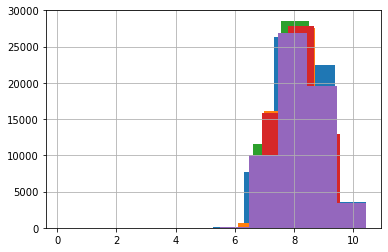

In [60]:
#all the seperate sets shows similar destribution 
folds=df_train["kfold"].unique()
for i in folds:
    df_train[df_train.kfold==i].target.hist()

In [61]:
df_train.to_csv("train_folds.csv",index=False)